In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "secret_key"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=secret_key


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.

city_data = []

#print the beginning of the logging

print("Beginning Data Retreval     ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

#loop through all the cities in our list
#for i in range(len(cities)):
    
    #Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        
    #create endpoint url with each city
    #city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1  
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
    

Beginning Data Retreval     
----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | bunbury
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | betanzos
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | quang ngai
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | yangjiang
Processing Record 16 of Set 1 | zhangye
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | hailar
Processing Re

Processing Record 38 of Set 4 | dingle
Processing Record 39 of Set 4 | bar harbor
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | benghazi
Processing Record 43 of Set 4 | mitsamiouli
Processing Record 44 of Set 4 | princesa isabel
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | kudahuvadhoo
Processing Record 47 of Set 4 | komsomolskiy
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | sinnamary
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | takoradi
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | erdaojiang
Processing Record 5 of Set 5 | araras
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | sangar
Processing Record 8 of Set 5 | northam
Processing Record 9 of Set 5 | kutum
Processing Record 10 of Set 5 | aksarka
Processing Record 11 of Set 5 | andenes
Processing Record 12 of 

Processing Record 28 of Set 8 | bargal
City not found. Skipping...
Processing Record 29 of Set 8 | saint-max
Processing Record 30 of Set 8 | nanortalik
Processing Record 31 of Set 8 | mantua
Processing Record 32 of Set 8 | jibuti
Processing Record 33 of Set 8 | kiruna
Processing Record 34 of Set 8 | plerin
Processing Record 35 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 8 | souillac
Processing Record 37 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 38 of Set 8 | duma
Processing Record 39 of Set 8 | tawala
Processing Record 40 of Set 8 | victoria
Processing Record 41 of Set 8 | gushi
Processing Record 42 of Set 8 | kamenka
Processing Record 43 of Set 8 | wanning
Processing Record 44 of Set 8 | kamskiye polyany
Processing Record 45 of Set 8 | san andres
Processing Record 46 of Set 8 | simplicio mendes
Processing Record 47 of Set 8 | kalmunai
Processing Record 48 of Set 8 | hamilton
Processing Record 49 of Set 8 | port augusta
Pro

Processing Record 14 of Set 12 | kusye-aleksandrovskiy
City not found. Skipping...
Processing Record 15 of Set 12 | cooma
Processing Record 16 of Set 12 | caravelas
Processing Record 17 of Set 12 | sorong
Processing Record 18 of Set 12 | rocha
Processing Record 19 of Set 12 | rawson
Processing Record 20 of Set 12 | mahon
Processing Record 21 of Set 12 | gorontalo
Processing Record 22 of Set 12 | sistranda
Processing Record 23 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 24 of Set 12 | puerto narino
Processing Record 25 of Set 12 | rudbar
Processing Record 26 of Set 12 | cairns
Processing Record 27 of Set 12 | tecpan
Processing Record 28 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 29 of Set 12 | la sarre
Processing Record 30 of Set 12 | khor
Processing Record 31 of Set 12 | sayyan
Processing Record 32 of Set 12 | bobo dioulasso
Processing Record 33 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 34 of Set 12 | rundu
Processi

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,75.20,69,90,6.91,US,2021-01-31 20:29:09
1,Bluff,-46.6000,168.3333,57.36,78,56,5.37,NZ,2021-01-31 20:29:10
2,Bunbury,-33.3333,115.6333,60.01,82,0,16.53,AU,2021-01-31 20:29:10
3,Cherskiy,68.7500,161.3000,-19.19,81,94,4.81,RU,2021-01-31 20:26:41
4,Cape Town,-33.9258,18.4232,71.01,83,75,10.36,ZA,2021-01-31 20:27:42
5,Vaini,-21.2000,-175.2000,75.20,94,90,11.50,TO,2021-01-31 20:29:10
6,Ushuaia,-54.8000,-68.3000,55.40,54,75,3.44,AR,2021-01-31 20:29:11
7,Betanzos,43.2804,-8.2147,59.00,77,75,13.80,ES,2021-01-31 20:29:11
8,Faanui,-16.4833,-151.7500,81.21,75,98,10.42,PF,2021-01-31 20:29:11
9,Jamestown,42.0970,-79.2353,32.00,74,90,14.97,US,2021-01-31 20:29:11


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [18]:
#create the output file (csv)

output_data_file = "weather_data/cities.csv"

#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
#Get Data for Plotting
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


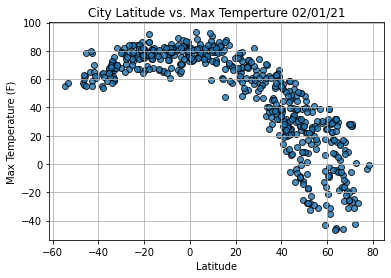

In [22]:
# Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorportate the other grapsh properties.
plt.title(f"City Latitude vs. Max Temperture "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

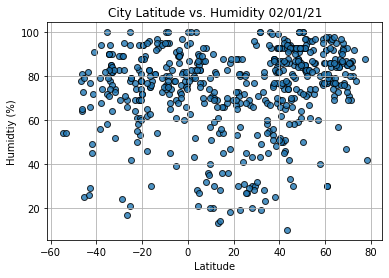

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

## Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidtiy (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

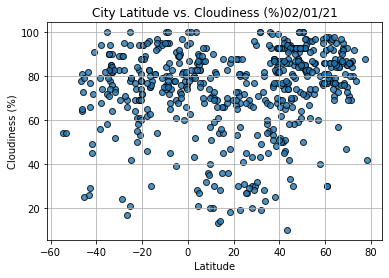

In [27]:
# Plot Latitude vs. Cloudiness
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

## Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

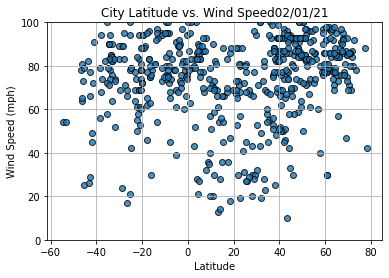

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

## Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0, 100)
#Save the figure
#plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()